# THE LaCE EMULATORS WITH GADGET AND NYX SIMULATIONS

A new version of the LaCE emulators including Nyx simulations is now available in igmhub/LaCE: https://github.com/igmhub/LaCE


In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load LaCE-related modules
from lace.archive import gadget_archive
from lace.archive import nyx_archive
from lace.emulator.nn_emulator import NNEmulator
from lace.emulator.gp_emulator import GPEmulator

## GENERAL USAGE

There are two emulator objects:
- GPEmulator(**args)
- NNEmulator(**args)

And for both, we can call them specifying:
- A custom archive that we have externally generated
- A training set label (training_set), pointing the emulator to a pre-defined training set.

There is also the option of defining a pre-defined emulator with the same configuration as the emulator used in a given publication

## EXAMPLES

### A. HOW TO CREATE AN ARCHIVE

In [3]:
# Gadget archive with the post-processing using in Pedersen21
mpg_arch_P21 = gadget_archive.GadgetArchive(postproc="Pedersen21")

In the post-processing in Pedersen21, the P1D is measured along one axis, while in Cabayol23, we measure the P1D along the three axes.

In [4]:
# Gadget archive with the post-processing using in Cabayol23
mpg_arch_C23 = gadget_archive.GadgetArchive(postproc="Cabayol23")

In [5]:
# Nyx archive provided by Solene Chabanier (this function takes a while, so you can limit the z range)
nyx_arch = nyx_archive.NyxArchive(zmax=4.1,verbose=True)

read Nyx sim bar_ic_grid_3
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_0
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_1
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_10
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_11
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_12
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4


### B. HOW TO CREATE AN EMULATOR

When calling an emulator, we can choose the settings, or ask for a pre-defined emulator's configuration.
There are three possibilities:

    - Pedersen21: Configuration used in Pedersen21. kmax=3, kbin emulator (available for GP).
    - Pedersen23: Configuration used in Pedersen23. kmax=3, polyfit emulator (available for GP).
    - Cabayol23: Configuration used in Cabayol-Garcia 2023. kmax=4, polyfit emulator (available for NN).

This creates a GP emulator with the default configuration from Pedersen21

In [6]:
gp_emu_P21 = GPEmulator(archive=mpg_arch_P21,emulator_label='Pedersen21')

Use custom archive provided by the user
Select emulator in Pedersen21
Gaussian Process emulator predicting the P1D at each k-bin. It goes to scales of 3Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones.


 /Users/font/opt/anaconda3/envs/lace_env/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 330 points
GPs optimised in 1.66 seconds


This creates a GP emulator with the default configuration from Pedersen23 (same archive, different settings)

In [7]:
gp_emu_P23 = GPEmulator(archive=mpg_arch_P21,emulator_label='Pedersen23')

Use custom archive provided by the user
Select emulator in Pedersen23
Gaussian Process emulator predicting the optimal P1Dfitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones
Training GP on 330 points
GPs optimised in 0.81 seconds


This creates a NN emulator with the default configuration of Cabayol23

In [8]:
nn_emu_C23 = NNEmulator(archive=mpg_arch_C23, emulator_label='Cabayol23')

Select emulator in Cabayol23
Neural network emulating the optimal P1D of Gadget simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones
Use custom archive provided by the user
Training samples in archive : 9900


This creates a NN emulator with settings similar to those used in Cabayol23

In [9]:
# this might take a while to train...
nn_emu_nyx = NNEmulator(archive=nyx_arch, emulator_label='Cabayol23_Nyx')

Select emulator in Cabayol23_Nyx
Neural network emulating the optimal P1D of Nyx simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones
Use custom archive provided by the user
Training samples in archive : 2932


### C. POINTING ALSO TO A PRE-DEFINED TRAINING SET

You can also specify the training set instead of passing an archive. If you want to test this, set load_training=True (it will take some time to run)

In [10]:
load_training=False

In [11]:
if load_training:
    gp_emu_P21 = GPEmulator(training_set='Pedersen21', emulator_label='Pedersen21')

In [12]:
if load_training:
    gp_emu_P23 = GPEmulator(training_set='Pedersen21', emulator_label='Pedersen23')

In [13]:
if load_training:
    nn_emu_C23 = NNEmulator(training_set='Cabayol23', emulator_label='Cabayol23')

In [14]:
if load_training:
    nn_emu_nyx = NNEmulator(training_set='Nyx', emulator_label='Cabayol23_Nyx')

### TESTING THE EMULATOR

One can also ask the archives for a testing set (a simulation not included in the emulator training)

In [15]:
mpg_test_P21 = mpg_arch_P21.get_testing_data(sim_label='mpg_central')

In [16]:
mpg_test_C23 = mpg_arch_C23.get_testing_data(sim_label='mpg_neutrinos')

In [17]:
nyx_test = nyx_arch.get_testing_data(sim_label='nyx_3')

In [29]:
def emulator_vs_true(emulator, test_data, iz=0, plot_ratio=True):
    # get emulator parameter values of the test data
    model={}
    for param in emulator.emu_params:
        model[param]=test_data[iz][param]
        print(param,model[param])
    # get true P1D in test data (over a certain k range)
    k_Mpc = test_data[iz]['k_Mpc']
    test_p1d = test_data[iz]['p1d_Mpc']
    # k range used in plot
    mask = (k_Mpc>0) & (k_Mpc<emulator.kmax_Mpc)
    k_Mpc = k_Mpc[mask]
    test_p1d = test_p1d[mask]
    # make emulator prediction
    emu_p1d = emulator.emulate_p1d_Mpc(model,k_Mpc)
    if plot_ratio:
        plt.plot(k_Mpc,emu_p1d/test_p1d-1.0)
        plt.plot(k_Mpc,k_Mpc*0.0,ls=':',color='gray')
        plt.ylabel(r'P1D residuals (emulated / true)', fontsize = 14)
    else:
        plt.plot(k_Mpc,emu_p1d,label='emulated')
        plt.plot(k_Mpc,test_p1d,label='true')
        plt.legend(fontsize = 14)
        plt.ylabel(r'P1D [Mpc]', fontsize = 14)
    plt.xlabel(r'$k$ [1/Mpc]', fontsize = 14)

mF 0.594053238064041
sigT_Mpc 0.1268464296335079
gamma 1.4976862040208383
kF_Mpc 11.064299239950309
Delta2_p 0.3107109675962954
n_p -2.300054268279585


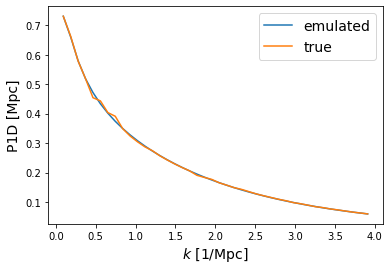

In [30]:
emulator_vs_true(gp_emu_P23,mpg_test_P21,iz=5,plot_ratio=False)

Delta2_p 0.3112494853310696
n_p -2.3004520418815004
mF 0.5989005061125677
sigT_Mpc 0.12510472146509544
gamma 1.4977820748005977
kF_Mpc 11.20642749115004


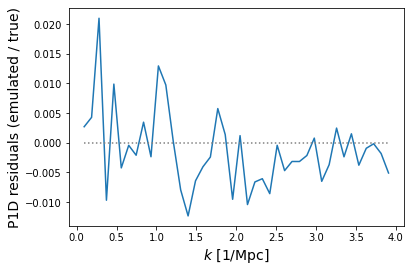

In [31]:
emulator_vs_true(nn_emu_C23,mpg_test_C23,iz=5,plot_ratio=True)

Delta2_p 0.6885040336803736
n_p -2.257060966019537
mF 0.8407075366666668
sigT_Mpc 0.12402128190398638
gamma 1.6149759
lambda_P 62.06629226388475


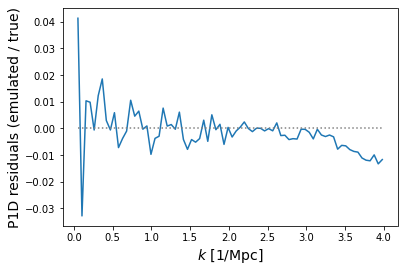

In [32]:
emulator_vs_true(nn_emu_nyx,nyx_test,iz=0,plot_ratio=True)